# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.113947e+01     7.038273e+00
 * time: 0.0028829574584960938
     1     2.959393e+01     4.513964e+00
 * time: 0.014040946960449219
     2     2.383298e+01     6.831964e+00
 * time: 0.027920007705688477
     3     2.110297e+01     8.653360e+00
 * time: 0.04182600975036621
     4     2.017859e+01     8.174490e+00
 * time: 0.05539202690124512
     5     1.815265e+01     6.887168e+00
 * time: 0.07021713256835938
     6     1.295098e+01     3.119484e+00
 * time: 0.08400106430053711
     7     1.020271e+01     1.295826e+00
 * time: 0.09788799285888672
     8     9.313807e+00     1.689582e+00
 * time: 0.10947608947753906
     9     8.935284e+00     9.356258e-01
 * time: 0.12098503112792969
    10     8.685384e+00     1.042163e+00
 * time: 0.13210010528564453
    11     8.486253e+00     7.126821e-01
 * time: 0.14351415634155273
    12     8.314640e+00     6.191712e-01
 * time: 0.1551511287689209
    13     8.302833e+00     1.201175e+00
 * ti

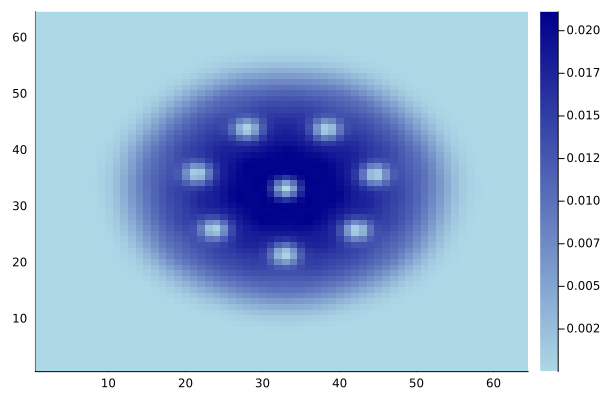

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)